## MATH 6373 Homework 3
## Atanga Cynthia
## Jasmine Eshun

In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=8ed85cdc75dd76055d9c611440fc70d8405ff8390c538f4286c3c3a1d0ca71c9
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import math
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){

$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the
raw code."></form>''')

### 2. a) Importing Data Set

The stock values of 50 major tech companies in the stock market are imported from the yahoo finance website. 49 of these companies are going to be used to develop a model that predicts the closing stock price of the 50th (target) company one day ahead of the current day (day t+1). The closing stock values specifically of these 49 companies are being used for this prediction analysis. 

In [3]:
#importing data set
stocks = ["MSFT","AAPL",'TSM',"INTC","CSCO","NVDA","ORCL","ADBE","SAP","CRM",'ASM','ACN','IBM','AVGO','TXN','QCOM','FIS','SNE','SPLK','INTU','AMD','FISV','NOW','VMW','MU','AMAT','ADSK','ADI','LRCX','MCHP','INFY','WDAY','PANW','CTSH','ERIC','FLT','MSI','NXPI','KLAC','APH','VRSN','TEL','SNPS','STM','CDNS','XLNX','ANSS','HPQ','CAJ','RNG']
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2017,12,31)
data = yf.download(stocks, start=start, end=end)

[*********************100%***********************]  50 of 50 completed


In [4]:
#dataframe
data=data['Close']
data

,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANSS,APH,ASM,AVGO,CAJ,CDNS,CRM,CSCO,CTSH,ERIC,FIS,FISV,FLT,HPQ,IBM,INFY,INTC,INTU,KLAC,LRCX,MCHP,MSFT,MSI,MU,NOW,NVDA,NXPI,ORCL,PANW,QCOM,RNG,SAP,SNE,SNPS,SPLK,STM,TEL,TSM,TXN,VMW,VRSN,WDAY,XLNX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,79.018570,81.129997,59.290001,49.279999,49.250000,17.549999,3.95,86.010002,43.869999,1.20,52.650002,31.580000,14.010000,54.860001,22.000000,49.419998,11.88,53.000000,29.100000,118.379997,12.561308,185.529999,6.94125,25.790001,75.940002,63.380001,53.950001,44.169998,37.160000,66.330002,21.660000,55.689999,15.860000,43.919998,37.840000,55.660000,73.320000,17.840000,84.910004,17.160000,40.419998,71.459999,7.770000,54.450001,17.150000,43.099998,89.500000,60.020000,81.769997,45.970001
2014-01-03,77.282860,81.400002,59.160000,49.610001,48.900002,17.510000,4.00,85.599998,44.029999,1.24,52.849998,31.570000,14.170000,55.119999,21.980000,49.160000,11.86,53.150002,29.020000,116.620003,12.870118,186.639999,7.14375,25.780001,75.800003,63.470001,53.939999,44.540001,36.910000,66.199997,20.969999,55.180000,15.670000,43.560001,37.619999,57.439999,72.889999,17.980000,84.330002,17.180000,40.619999,70.980003,7.830000,54.490002,16.950001,43.290001,89.419998,59.840000,82.470001,45.619999
2014-01-06,77.704285,80.540001,58.119999,49.330002,48.549999,17.290001,4.13,85.019997,43.625000,1.29,52.490002,31.670000,14.270000,54.230000,22.010000,48.935001,11.84,52.849998,29.055000,116.110001,12.847411,186.000000,7.03875,25.459999,75.739998,62.360001,53.250000,44.450001,36.130001,65.919998,20.670000,55.730000,15.880000,43.119999,37.470001,57.840000,72.699997,17.450001,84.419998,17.299999,40.250000,70.779999,7.820000,54.459999,16.900000,42.930000,89.070000,59.459999,84.589996,45.419998
2014-01-07,77.148575,81.519997,58.970001,49.590000,49.680000,17.370001,4.18,85.580002,43.919998,1.19,52.990002,31.590000,14.340000,54.950001,22.309999,49.560001,11.84,52.950001,29.200001,116.550003,12.797457,189.710007,7.01125,25.590000,77.059998,62.330002,53.910000,44.700001,36.410000,66.190002,21.730000,57.779999,16.139999,42.970001,37.849998,59.990002,73.239998,18.120001,84.180000,17.320000,40.340000,75.389999,7.680000,54.900002,16.910000,42.700001,94.709999,61.139999,88.129997,45.520000
2014-01-08,77.637146,82.150002,58.900002,49.709999,50.240002,17.420000,4.18,85.279999,44.165001,1.18,53.779999,30.940001,14.420000,56.939999,22.290001,49.974998,11.94,53.000000,29.355000,117.800003,12.465940,187.970001,6.97000,25.430000,76.440002,62.299999,54.180000,45.290001,35.759998,65.989998,23.870001,57.889999,16.360001,43.830002,37.720001,60.049999,73.680000,18.940001,85.449997,18.250000,40.779999,74.910004,7.550000,55.139999,17.090000,43.290001,93.449997,61.240002,89.000000,45.910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,175.009995,153.889999,175.000000,88.849998,103.889999,52.060001,10.54,146.660004,88.139999,1.46,262.350006,38.459999,42.259998,102.629997,38.549999,71.699997,6.64,94.320000,65.160004,190.460007,21.260000,152.500000,8.05000,46.700001,158.500000,109.320000,186.690002,88.919998,85.510002,90.760002,44.119999,129.190002,195.270004,116.699997,47.360001,146.149994,64.730003,47.700001,112.580002,45.680000,85.820000,82.750000,22.250000,94.949997,39.630001,104.129997,127.690002,113.989998,102.320000,67.919998
2017-12-26,170.570007,152.990005,174.440002,88.629997,103.800003,51.049999,10.46,146.389999,87.790001,1.41,258.100006,38.610001,41.970001,102.540001,38.480000,71.239998,6.61,94.129997,65.699997,191.339996,21.230000,152.830002,8.10500,46.080002,158.929993,107.650002,184.309998,88.629997,85.400002,90.669998,42.250000,129.320007,197.440002,116.570000,47.430000,146.190002,64.300003,48.849998,112.360001,45.209999,85.349998,82.269997,21.700001,95.260002,38.950001,104.150002,127.559998,113.910004,102.930000,67.599998
2

fill null values with the column means

In [5]:
data[data.isnull().any(axis=1)]

,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANSS,APH,ASM,AVGO,CAJ,CDNS,CRM,CSCO,CTSH,ERIC,FIS,FISV,FLT,HPQ,IBM,INFY,INTC,INTU,KLAC,LRCX,MCHP,MSFT,MSI,MU,NOW,NVDA,NXPI,ORCL,PANW,QCOM,RNG,SAP,SNE,SNPS,SPLK,STM,TEL,TSM,TXN,VMW,VRSN,WDAY,XLNX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data=data.fillna(data.mean())


No null values present

In [7]:
data[data.isnull().any(axis=1)]

,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANSS,APH,ASM,AVGO,CAJ,CDNS,CRM,CSCO,CTSH,ERIC,FIS,FISV,FLT,HPQ,IBM,INFY,INTC,INTU,KLAC,LRCX,MCHP,MSFT,MSI,MU,NOW,NVDA,NXPI,ORCL,PANW,QCOM,RNG,SAP,SNE,SNPS,SPLK,STM,TEL,TSM,TXN,VMW,VRSN,WDAY,XLNX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


The target company (TEL) is moved to the last column after relabeling as 'Y'.

In [8]:
#move target column to last position
data.rename(columns={'TEL':'Y'},inplace=True)
Y=data.pop('Y')
data.insert(49,'Y',Y)
data.head()

,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANSS,APH,ASM,AVGO,CAJ,CDNS,CRM,CSCO,CTSH,ERIC,FIS,FISV,FLT,HPQ,IBM,INFY,INTC,INTU,KLAC,LRCX,MCHP,MSFT,MSI,MU,NOW,NVDA,NXPI,ORCL,PANW,QCOM,RNG,SAP,SNE,SNPS,SPLK,STM,TSM,TXN,VMW,VRSN,WDAY,XLNX,Y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,79.018570,81.129997,59.290001,49.279999,49.250000,17.549999,3.95,86.010002,43.869999,1.20,52.650002,31.580000,14.01,54.860001,22.000000,49.419998,11.88,53.000000,29.100000,118.379997,12.561308,185.529999,6.94125,25.790001,75.940002,63.380001,53.950001,44.169998,37.160000,66.330002,21.660000,55.689999,15.860000,43.919998,37.840000,55.660000,73.320000,17.840000,84.910004,17.160000,40.419998,71.459999,7.77,17.150000,43.099998,89.500000,60.020000,81.769997,45.970001,54.450001
2014-01-03,77.282860,81.400002,59.160000,49.610001,48.900002,17.510000,4.00,85.599998,44.029999,1.24,52.849998,31.570000,14.17,55.119999,21.980000,49.160000,11.86,53.150002,29.020000,116.620003,12.870118,186.639999,7.14375,25.780001,75.800003,63.470001,53.939999,44.540001,36.910000,66.199997,20.969999,55.180000,15.670000,43.560001,37.619999,57.439999,72.889999,17.980000,84.330002,17.180000,40.619999,70.980003,7.83,16.950001,43.290001,89.419998,59.840000,82.470001,45.619999,54.490002
2014-01-06,77.704285,80.540001,58.119999,49.330002,48.549999,17.290001,4.13,85.019997,43.625000,1.29,52.490002,31.670000,14.27,54.230000,22.010000,48.935001,11.84,52.849998,29.055000,116.110001,12.847411,186.000000,7.03875,25.459999,75.739998,62.360001,53.250000,44.450001,36.130001,65.919998,20.670000,55.730000,15.880000,43.119999,37.470001,57.840000,72.699997,17.450001,84.419998,17.299999,40.250000,70.779999,7.82,16.900000,42.930000,89.070000,59.459999,84.589996,45.419998,54.459999
2014-01-07,77.148575,81.519997,58.970001,49.590000,49.680000,17.370001,4.18,85.580002,43.919998,1.19,52.990002,31.590000,14.34,54.950001,22.309999,49.560001,11.84,52.950001,29.200001,116.550003,12.797457,189.710007,7.01125,25.590000,77.059998,62.330002,53.910000,44.700001,36.410000,66.190002,21.730000,57.779999,16.139999,42.970001,37.849998,59.990002,73.239998,18.120001,84.180000,17.320000,40.340000,75.389999,7.68,16.910000,42.700001,94.709999,61.139999,88.129997,45.520000,54.900002
2014-01-08,77.637146,82.150002,58.900002,49.709999,50.240002,17.420000,4.18,85.279999,44.165001,1.18,53.779999,30.940001,14.42,56.939999,22.290001,49.974998,11.94,53.000000,29.355000,117.800003,12.465940,187.970001,6.97000,25.430000,76.440002,62.299999,54.180000,45.290001,35.759998,65.989998,23.870001,57.889999,16.360001,43.830002,37.720001,60.049999,73.680000,18.940001,85.449997,18.250000,40.779999,74.910004,7.55,17.090000,43.290001,93.449997,61.240002,89.000000,45.910000,55.139999


### 2. b) PreProcessing of time series
Computing moving mean and normalizing

In [9]:
#computing moving mean
#data_mm=data.expanding(min_periods=1).mean()
#data_mm.head()
data_mm=data.mean()
print('Normalized Data')
#normalized Yij
df=data/data_mm
df

Normalized Data


,AAPL,ACN,ADBE,ADI,ADSK,AMAT,AMD,ANSS,APH,ASM,AVGO,CAJ,CDNS,CRM,CSCO,CTSH,ERIC,FIS,FISV,FLT,HPQ,IBM,INFY,INTC,INTU,KLAC,LRCX,MCHP,MSFT,MSI,MU,NOW,NVDA,NXPI,ORCL,PANW,QCOM,RNG,SAP,SNE,SNPS,SPLK,STM,TSM,TXN,VMW,VRSN,WDAY,XLNX,Y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.676347,0.771077,0.608794,0.779000,0.718966,0.640451,0.668511,0.907498,0.731173,0.777096,0.355553,0.996771,0.583884,0.749826,0.771807,0.842863,1.277335,0.758110,0.630049,0.807752,0.816908,1.149070,0.872582,0.772079,0.723375,0.849090,0.561665,0.776416,0.687066,0.921254,0.886038,0.709485,0.258454,0.502830,0.908265,0.426876,1.158434,0.799911,1.017486,0.620521,0.747033,1.180631,0.765357,0.650214,0.693248,1.063715,0.794807,0.958312,0.901431,0.813586
2014-01-03,0.661490,0.773644,0.607459,0.784217,0.713857,0.638991,0.676974,0.903172,0.733840,0.802999,0.356904,0.996456,0.590552,0.753379,0.771105,0.838428,1.275184,0.760256,0.628316,0.795743,0.836991,1.155945,0.898038,0.771780,0.722041,0.850295,0.561561,0.782920,0.682444,0.919449,0.857813,0.702987,0.255358,0.498708,0.902984,0.440528,1.151640,0.806189,1.010535,0.621244,0.750729,1.172701,0.771267,0.642631,0.696304,1.062764,0.792423,0.966516,0.894568,0.814184
2014-01-06,0.665097,0.765470,0.596780,0.779790,0.708747,0.630962,0.698975,0.897053,0.727089,0.835378,0.354473,0.999612,0.594720,0.741215,0.772158,0.834591,1.273034,0.755965,0.629074,0.792263,0.835515,1.151981,0.884839,0.762200,0.721470,0.835425,0.554377,0.781338,0.668022,0.915560,0.845541,0.709994,0.258780,0.493671,0.899384,0.443596,1.148638,0.782424,1.011614,0.625583,0.743891,1.169397,0.770282,0.640736,0.690514,1.058604,0.787391,0.991361,0.890646,0.813736
2014-01-07,0.660341,0.774784,0.605508,0.783900,0.725243,0.633882,0.707437,0.902961,0.732006,0.770620,0.357849,0.997087,0.597637,0.751056,0.782682,0.845251,1.273034,0.757395,0.632214,0.795266,0.832266,1.174959,0.881382,0.766092,0.734044,0.835023,0.561249,0.785733,0.673199,0.919310,0.888902,0.736111,0.263017,0.491954,0.908505,0.460085,1.157170,0.812466,1.008738,0.626307,0.745554,1.245561,0.756492,0.641115,0.686814,1.125636,0.809638,1.032848,0.892607,0.820310
2014-01-08,0.664522,0.780772,0.604789,0.785797,0.733418,0.635707,0.707437,0.899796,0.736090,0.764144,0.363184,0.976571,0.600971,0.778255,0.781981,0.852328,1.283786,0.758110,0.635570,0.803795,0.810706,1.164182,0.876196,0.761302,0.728138,0.834621,0.564060,0.796104,0.661181,0.916532,0.976442,0.737512,0.266602,0.501799,0.905385,0.460545,1.164122,0.849233,1.023956,0.659936,0.753686,1.237631,0.743687,0.647939,0.696304,1.110661,0.810962,1.043045,0.900254,0.823896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,1.497969,1.462604,1.796912,1.404508,1.516617,1.899821,1.783826,1.547421,1.469012,0.945467,1.771687,1.213927,1.761237,1.402745,1.352416,1.222850,0.713931,1.349150,1.410789,1.299582,1.382617,0.944500,1.011963,1.398065,1.509809,1.464539,1.943600,1.563028,1.581029,1.260562,1.804802,1.645867,3.182116,1.336071,1.136771,1.120877,1.022715,2.138776,1.349058,1.651829,1.586105,1.367160,2.191659,1.502506,1.674894,1.517606,1.509497,1.199150,1.331851,1.418733
2017-12-26,1.459966,1.454051,1.791162,1.401030,1.515303,1.862963,1.770286,1.544573,1.463179,0.913088,1.742987,1.218662,1.749151,1.401515,1.349960,1.215005,0.710706,1.346433,1.422481,1.305587,1.380666,0.946544,1.018877,1.379504,1.513905,1.442166,1.918823,1.557930,1.578995,1.259312,1.728306,1.647523,3.217478,1.334583,1.138451,1.121183,1.015921,2.190340,1.346422,1.634834,1.577419,1.359230,2.137484,1.476725,1.675215,1.516061,1.508438,1.206299,1.325576,1.423365
2017-12-27,1.460223,1.457187,1.800609,1.408460,1.526690,1.885954,1.782133,1.547421,1.468179,0.926040,1.749875,1.188045,1.760820,1.403019,1.352767,1.214323,0.708555,1.344573,1.423455,1.306201,1.383267,0.948402,1.016991,1.380402,1.512000,1.437210,1.929858,1.553887,1.584727,1.261117,1.73771

### 3) Create Training and Test sets for an MLP predictor :
create an Nx250 data frame from the original data set

In [0]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [11]:

# frame as supervised learning
reframed = series_to_supervised(df, 4, 2)  ### specify how many days to look back ###
# drop columns we don't want to predict
Xt=reframed.iloc[:,:250]
Yt=reframed.iloc[:,-1]
print('Dimension on Xt and TARGt')
Xt.shape, Yt.shape


Dimension on Xt and TARGt


((1003, 250), (1003,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.1, random_state=1)
print('Dimension of train and test')
x_train.shape, x_test.shape

Dimension of train and test


((902, 250), (101, 250))

### 4) AutoEncoder to compress the input vectors Xt
#### 4.1) Compute a plausible dimension h for H

h100: 250




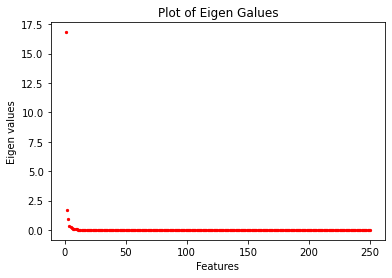

In [13]:
pca1=PCA(0.9999999999)
pca1.fit(x_train)
h100=pca1.n_components_
print('h100:',h100)
vals1=pca1.explained_variance_ #get eigen values
Lj=vals1.tolist()
j=list(range(1,len(Lj)+1))
plt.scatter(j,Lj,c='red',s=5)
plt.title('Plot of Eigen Galues')
plt.xlabel('Features')
plt.ylabel('Eigen values')
print('\n')

Text(0.5, 0, 'Features')

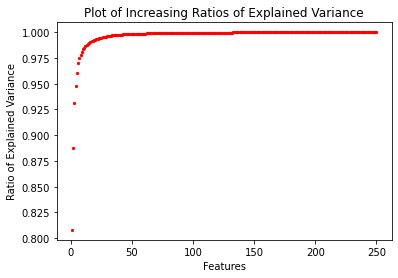

In [14]:
x=pd.DataFrame(Lj).cumsum()
RATj=x/sum(Lj)
plt.scatter(j,RATj,c='red',s=5)
plt.title('Plot of Increasing Ratios of Explained Variance')
plt.ylabel('Ratio of Explained Variance')
plt.xlabel('Features')

Number of components, h90: 3
eigen values from x_train: 
 [16.81, 1.65, 0.92]


Text(0.5, 1.0, 'Plot of x_train Eigen Values')

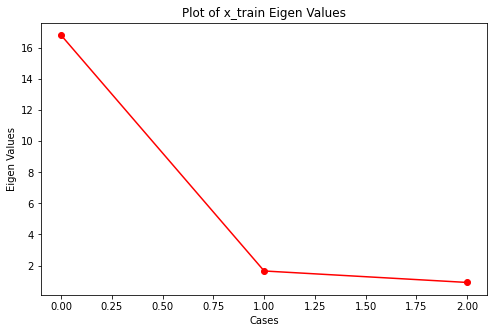

In [15]:
pca=PCA(0.90)
pca.fit(x_train)
h90=pca.n_components_
print('Number of components, h90:',h90)
eigval_train=pca.explained_variance_ #get eigen values
round_eig=[round(num, 2) for num in eigval_train]
print('eigen values from x_train:','\n',round_eig)

#plot eigen values
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.figure(1)
plt.plot(eigval_train,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of x_train Eigen Values')

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

# constructing the autoencoder

# determine h through PCA on your own data
# try to find suitable initializers for your own data
h = h90
model = Sequential()
model.add(Dense(h, activation='relu', input_dim=250, bias_initializer=Constant(value=10)))
model.add(Dense(250, activation='relu', bias_initializer=Constant(value=5)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 753       
_________________________________________________________________
dense_1 (Dense)              (None, 250)               1000      
Total params: 1,753
Trainable params: 1,753
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras import optimizers, losses

model.compile(optimizer=optimizers.SGD(learning_rate=0.05, decay=1e-7), loss='mean_squared_error')
from tensorflow.keras import callbacks

# the following callback to record losses after each batch
class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(x_train,x_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(x_test,x_test,verbose = 0))

MyMonitor = MyHistory()

# Keras built-in early-stopping callback
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000, restore_best_weights=True)

In [0]:
Monitor = model.fit(x_train, x_train, epochs=300, batch_size=100, callbacks = [MyMonitor, es], validation_data = (x_test, x_test), verbose = 2)

# After training, access MSE(AutoTrain) and MSE(AutoTest) through MyMonitor.MSEtrain and MyMonitor.MSEtest.

In [0]:
eval=model.evaluate(x_test, x_test)
print('loss')
round(eval,3)

4/4 [==============================] - 0s 2ms/step - loss: 0.0194
loss


0.019

Text(0.5, 1.0, 'Plot of MSEtrain and MSEtest from Autoencoder')

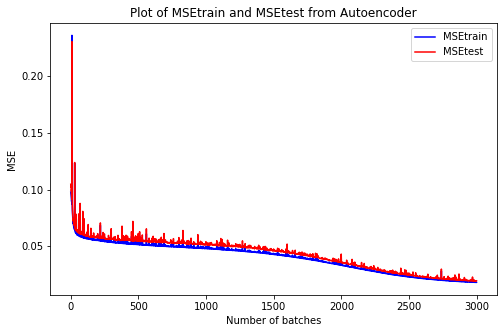

In [0]:
#plot MSE
labels=['MSEtrain','MSEtest']
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.figure(1)
plt.plot(MyMonitor.MSEtrain, label='MSEtrain', color='b')
plt.plot(MyMonitor.MSEtest, label='MSEtest', color='r')
plt.legend(labels)
plt.ylabel('MSE')
plt.xlabel('Number of batches')
plt.title('Plot of MSEtrain and MSEtest from Autoencoder')

In [19]:
# extract the hidden layer
Htrain = model.layers[0](np.asarray(x_train)).numpy()
Htest = model.layers[0](np.asarray(x_test)).numpy()
print(Htrain.shape)
Htrain


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(902, 3)


array([[13.044355, 13.808204, 11.447089],
       [12.856951, 14.217122,  8.965908],
       [12.961306, 13.900818, 11.219576],
       ...,
       [12.328495, 14.92569 ,  6.146386],
       [12.768374, 13.628706, 11.063791],
       [13.138271, 13.8866  , 11.267816]], dtype=float32)

In [20]:
print(Htest.shape)
Htest

(101, 3)


array([[12.2540655, 14.9613   ,  5.3091693],
       [12.989851 , 14.238993 ,  9.843283 ],
       [12.095924 , 14.814568 ,  4.860234 ],
       [13.134098 , 13.822874 , 10.815706 ],
       [12.858078 , 14.278931 ,  9.385612 ],
       [12.074359 , 14.757835 ,  5.2563143],
       [13.220545 , 14.232359 , 10.295817 ],
       [13.033497 , 14.411711 ,  9.3038   ],
       [12.651352 , 14.649795 ,  7.587202 ],
       [13.159918 , 13.842598 , 11.288483 ],
       [13.242935 , 14.2894535, 10.481325 ],
       [12.90295  , 13.803846 , 11.323273 ],
       [12.995976 , 13.65436  , 10.620801 ],
       [12.8552685, 13.654571 , 11.0611925],
       [12.921078 , 13.803164 , 10.656698 ],
       [13.001282 , 13.887289 , 11.174538 ],
       [13.092777 , 13.84069  , 11.228592 ],
       [13.124887 , 13.895273 , 11.396981 ],
       [12.932655 , 14.269508 ,  9.61526  ],
       [12.836994 , 14.133308 ,  9.018294 ],
       [13.115856 , 13.759853 , 10.902173 ],
       [13.048787 , 14.185143 , 10.412042 ],
       [12

In [0]:
  Htrain.shape,Htest.shape

((902, 3), (101, 3))

In [0]:
y_train=pd.DataFrame(y_train).values.reshape(902,1)
y_test=pd.DataFrame(y_test).values.reshape(101,1)

### 5) MLP predictor (deep learning method)

#### 5.1) Selection of size(K)

902 cases in NewTrain

numwth = h*k+k+k+1 < 902

here for my data h = 3, so 1<=K<=180

##### Evaluating values of k in 1<=k<=180

In [0]:
# K=25
mlp25 = Sequential()
mlp25.add(Dense(25, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp25.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp25.summary()
mlp25.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor = mlp25.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

In [0]:
z_train25=mlp25.predict(Htrain)
MREPtrain25=np.average(abs(z_train25-y_train)/y_train)
print('k=25, MREP_train:',round(MREPtrain25,3))

k=25, MREP_train: 0.345

In [0]:
# k=50
mlp50 = Sequential()
mlp50.add(Dense(50, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp50.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp50.summary()
mlp50.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
mlpMonitor = mlp50.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

In [0]:
z_train50=mlp50.predict(Htrain)
MREPtrain50=np.average(abs(z_train50-y_train)/y_train)
print('k=50, MREP_train:',round(MREPtrain50,3))

k=50, MREP_train: 0.41

In [0]:
# k=100
mlp100 = Sequential()
mlp100.add(Dense(100, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp100.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp100.summary()
mlp100.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
mlpMonitor = mlp100.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

In [0]:
z_train100=mlp100.predict(Htrain)
MREPtrain100=np.average(abs(z_train100-y_train)/y_train)
print('k=100, MREP_train:',round(MREPtrain100,3))

k=100, MREP_train: 0.86

In [0]:
# k=115
mlp115 = Sequential()
mlp115.add(Dense(115, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp115.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp115.summary()
mlp115.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
mlpMonitor = mlp115.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

In [0]:
z_train115=mlp115.predict(Htrain)
MREPtrain115=np.average(abs(z_train115-y_train)/y_train)
print('k=115, MREP_train:',round(MREPtrain115,3))

k=115, MREP_train: 0.162

In [0]:
# k=150
mlp150 = Sequential()
mlp150.add(Dense(150, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp150.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp150.summary()
mlp150.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
mlpMonitor = mlp150.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

In [0]:
z_train150=mlp150.predict(Htrain)
MREPtrain150=np.average(abs(z_train150-y_train)/y_train)
print('k=150, MREP_train:',round(MREPtrain150,3))

k=150, MREP_train: 0.321

In [0]:
# k=180
mlp180 = Sequential()
mlp180.add(Dense(180, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp180.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp180.summary()
mlp180.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
mlpMonitor = mlp180.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

In [0]:
z_train180=mlp180.predict(Htrain)
MREPtrain180=np.average(abs(z_train180-y_train)/y_train)
print('k=180, MREP_train:',round(MREPtrain180,3))

k=180, MREP_train: 1.0

The values of k are analysed on the mlp model with the same epoch and batch size to see which gave the best performance in terms of mean relative errors of prediction. The best value of K among all computed is k=115 with a value of 0.162. Although the maximum value of k for weights and biases, given 902 cases was 180, this value did not perform well compared to others. The best value of k is then used to build the mlp with more reliable epoch number and batch size.

In [0]:
mlp = Sequential()
mlp.add(Dense(115, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp.summary()

# configure suitable lr and decay

mlp.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor = mlp.fit(Htrain, y_train, epochs=300, batch_size=32, callbacks = [mlpMyMonitor, es], validation_data = (Htest, y_test), verbose = 2)

Text(0.5, 1.0, 'Plot of MSEtrain and MSEtest from MLP')

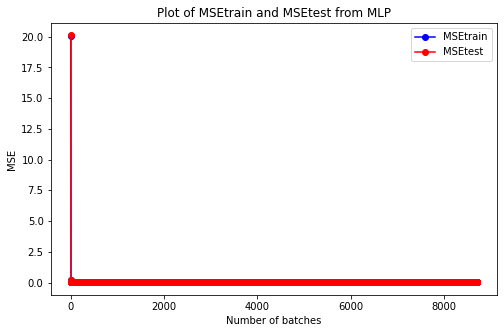

In [23]:
#plot MSE
labels=['MSEtrain','MSEtest']
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.figure(1)
plt.plot(mlpMyMonitor.MSEtrain,marker='o',label='MSEtrain', color='b')
plt.plot(mlpMyMonitor.MSEtest, marker='o',label='MSEtest', color='r')
plt.legend(labels)
plt.ylabel('MSE')
plt.xlabel('Number of batches')
plt.title('Plot of MSEtrain and MSEtest from MLP')

The train and test MSE plots are so close such that they almost completely overlap. They both decline fast to values very close to 0. This means that our error of predictions are very little and because the graphs overlap like so, we can say that our model generalises quite well.

Text(0.5, 1.0, 'Plot of TARGt_test and Zt_test from MLP')

<Figure size 432x288 with 0 Axes>

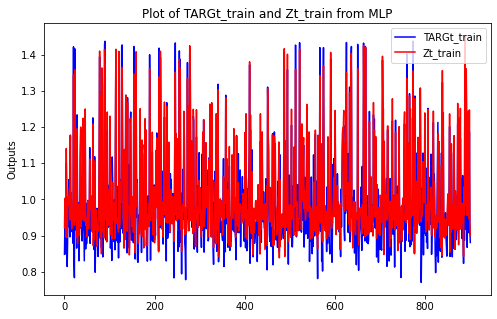

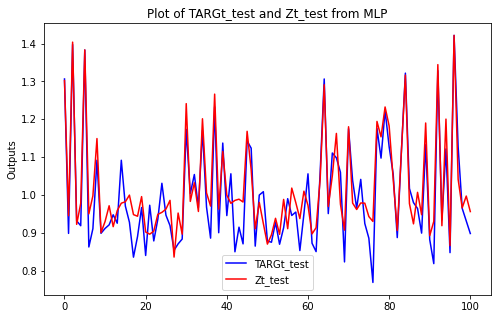

In [0]:
z_train=mlp.predict(Htrain)
z_test=mlp.predict(Htest)

#plot TARGt vs Zt
labels1=['TARGt_train','Zt_train']
labels2=['TARGt_test','Zt_test']

%matplotlib inline
plt.figure(2)
plt.figure(figsize=(8, 5))
plt.plot(y_train, color='b')
plt.plot(z_train, color='r')
plt.legend(labels1)
plt.ylabel('Outputs')
plt.title('Plot of TARGt_train and Zt_train from MLP')


plt.figure(3)
plt.figure(figsize=(8, 5))
plt.plot(y_test, color='b')
plt.plot(z_test, color='r')
plt.legend(labels2)
plt.ylabel('Outputs')
plt.title('Plot of TARGt_test and Zt_test from MLP')


The graphs of TARGt and Zt for both train and test show that the model did well in predicting the outputs close to the target outputs. This can be seen by how close and overlapping the graphs are on one another for both train and test. The values fluctuate evenly as well between the minimum and maximum TARGt values. Although we see good overlap, there are still outliers which shows that there are some slight errors in our predictions.

In [0]:
MREPtrain=np.average(abs(z_train-y_train)/y_train)
MREPtest=np.average(abs(z_test-y_test)/y_test)
print('MREPtrain:',round(MREPtrain,3))
print('MREPtest:',round(MREPtest,3))

MREPtrain: 0.049
MREPtest: 0.049


The MREP is quite low, 0.049, and the values for both train and test are the same or almost exactly the same. This means that out model does well in generalizing and will perform well on new data that it has not seen before.